In [1]:
import tensorflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/Unstopable18/Datasets/main/Churn_Modelling.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [6]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
3691,590,France,Female,76,5,160979.68,1,0,1,13848.58,0
918,784,Spain,Male,35,3,0.00,2,0,0,81483.64,0
8620,768,France,Female,40,8,0.00,2,0,1,69080.46,0
1276,635,Germany,Male,37,5,113488.68,1,1,0,95611.74,1
9975,610,Germany,Male,50,1,113957.01,2,1,0,196526.55,1
8082,772,Spain,Male,36,3,112029.83,1,1,1,186948.35,0
3285,735,Germany,Female,43,9,98807.45,1,0,0,184570.04,1
5430,714,France,Female,24,7,0.00,2,1,0,166335.00,0
4473,646,Germany,Female,29,4,105957.44,1,1,0,15470.91,0
6846,689,Spain,Female,40,5,154251.67,1,0,1,118319.50,0


In [7]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [8]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [9]:
df[df.IsActiveMember==1].Exited.value_counts()

0    4416
1     735
Name: Exited, dtype: int64

In [10]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [11]:
df[df.HasCrCard==1].Exited.value_counts()

0    5631
1    1424
Name: Exited, dtype: int64

In [12]:
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [13]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [14]:
df.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
610,495,30,10,129755.99,1,0,0,172749.65,0,0,0,1


In [15]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [16]:
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [17]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
#model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 1)                 12        
                                                                 
Total params: 144
Trainable params: 144
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [20]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 946.7932 - accuracy: 0.6175 - val_loss: 95.9222 - val_accuracy: 0.7006
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 62.3751 - accuracy: 0.6678 - val_loss: 45.4112 - val_accuracy: 0.7663
Epoch 3/100
128/128 [==============================] - 0s 3ms/step - loss: 42.5475 - accuracy: 0.6808 - val_loss: 38.9462 - val_accuracy: 0.7781
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 34.1681 - accuracy: 0.6850 - val_loss: 31.0146 - val_accuracy: 0.7006
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 32.7553 - accuracy: 0.6811 - val_loss: 36.5058 - val_accuracy: 0.6775
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 30.5337 - accuracy: 0.6848 - val_loss: 26.4174 - val_accuracy: 0.5506
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 32.0059 - accuracy: 0.6817 - val_loss: 71.7789 - val_a

In [21]:
y_pred = model.predict(X_test)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[4.9356800e-05],
       [9.2154288e-01],
       [1.5208827e-03],
       ...,
       [6.5972209e-02],
       [1.0000000e+00],
       [8.9189525e-06]], dtype=float32)

In [22]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

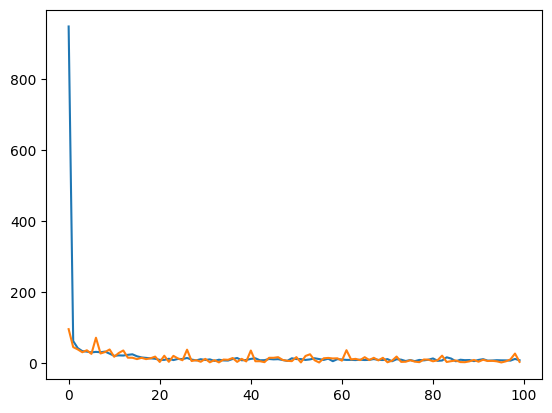

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

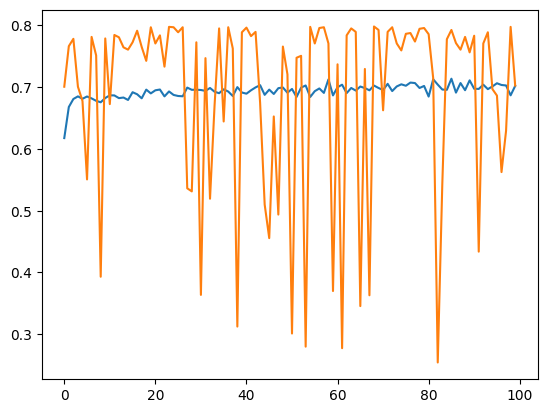

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])